In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.linalg import eig
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles, make_moons, make_gaussian_quantiles
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler

In [205]:
data = np.load("test_data.npy", allow_pickle = True ).item ()
# Data is a DICT with keys --- " data " and " labels "
X, labels = data["data"], data["labels"]

In [206]:
#Helper function to plot
def plot_clusters (data, true_labels=None, cluster_labels=None, title_true="True clusters", title_cluster="Agglomerative Clustering"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.scatter (data[:, 0], data[:, 1], c=true_labels) 
    ax1.set_title(title_true)
    if cluster_labels is not None:
        ax2.scatter (data[:, 0], data[:, 1], c=cluster_labels) 
        ax2.set_title(title_cluster)
    plt.show()

#Example usage:
#plot_clusters (blob_X, blob_true_labels, agglo_cluster. labels_,u title_cluster="Agglomerative Clustering")

In [207]:
seed = 0

In [208]:
X[0:5], labels[0:5]

(array([[ 0.54672236,  0.27927909, -2.68604296,  2.        ],
        [ 0.28032095, -0.7561507 , -1.11590602,  2.        ],
        [ 0.67632722,  0.83459768,  0.57416322,  2.        ],
        [ 1.20293528,  1.39106876, -2.9991174 ,  2.        ],
        [ 0.71185058,  1.56166453, -2.51449182,  2.        ]]),
 array([2, 1, 0, 2, 2], dtype=int64))

In [209]:
X.shape, labels.shape

((500, 4), (500,))

In [210]:
X_scaled = StandardScaler().fit_transform(X)

In [211]:
'''
pca = PCA(n_components=2)
X_ = pca.fit_transform(X_scaled)
'''

'\npca = PCA(n_components=2)\nX_ = pca.fit_transform(X_scaled)\n'

In [212]:
# Function to get the principal components 
def get_principal_comps (X, Vt,n):
    # X: data matrix, Vt: right singular matrix
    PC = X@(Vt.T)
    return PC[:,:n]

# SVD
U,S,Vt = np.linalg.svd(X_scaled)

n = 2
X_ = get_principal_comps(X_scaled,Vt,n)

In [213]:
X_.shape

(500, 2)

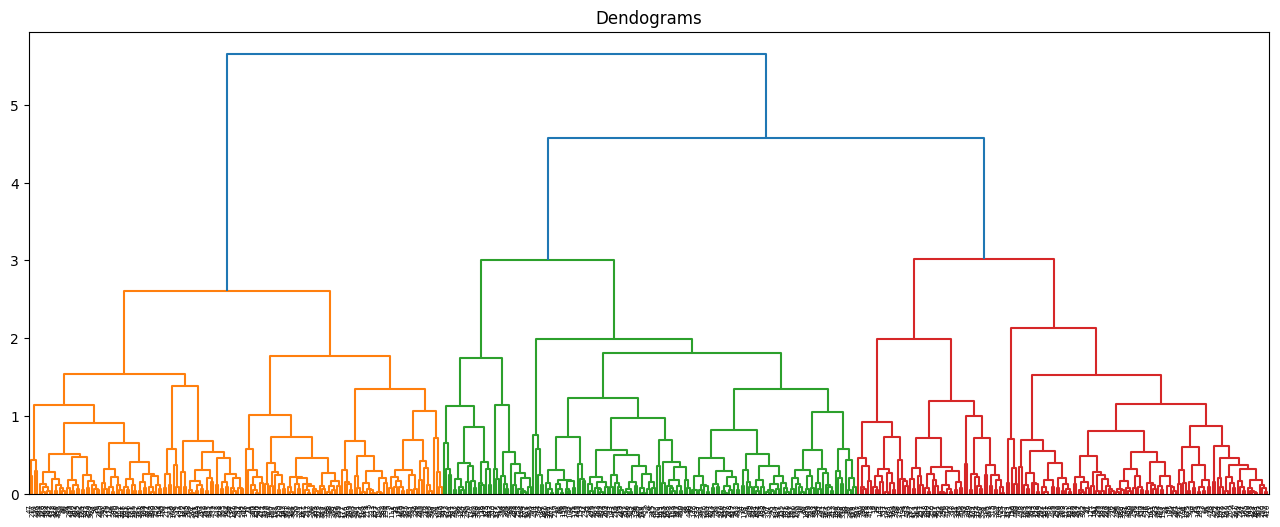

In [214]:
plt.figure(figsize=(16,6))
plt.title('Dendograms')
Z = shc.linkage(X_,method='complete')
dend = shc.dendrogram(Z)

## Agglomerative Clustering

In [215]:
agglo_cluster = AgglomerativeClustering (n_clusters=3, metric='euclidean', linkage= 'complete') 
agglo_cluster.fit(X_)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

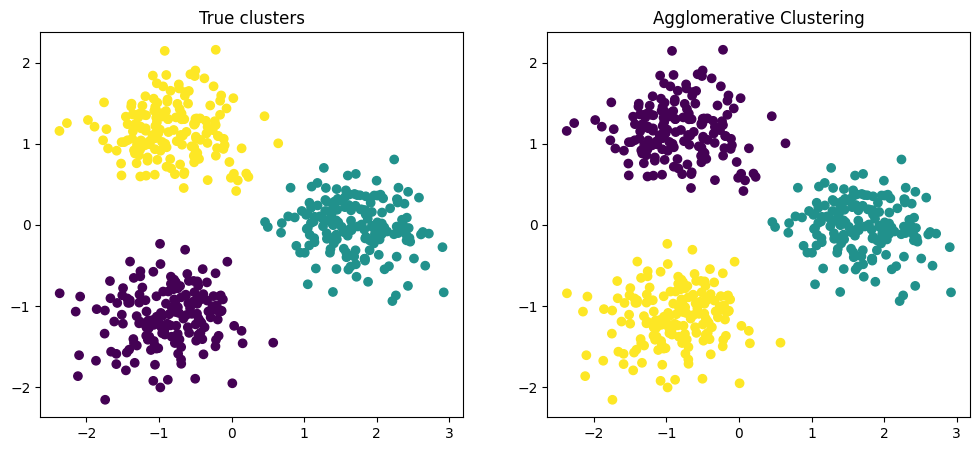

In [216]:
plot_clusters(X_,labels,agglo_cluster.labels_, title_cluster='Agglomerative Clustering')

In [217]:
X_, pred_labels, true_labels = X_, agglo_cluster.labels_, labels

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_,pred_labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_labels,pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels,pred_labels, average_method='arithmetic'))

Silhouette Coefficient: 0.685
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


It's evident that Agglomerative clustering achieves a perfect clustering result, as both the Rand Index and Mutual Information Score reach a maximum value of 1. The Silhouette score is reported as 0.685.

## DBSCAN

In [218]:
dbscan_cluster = DBSCAN(eps=0.6, min_samples=20)
dbscan_cluster.fit(X_)

DBSCAN(eps=0.6, min_samples=20)

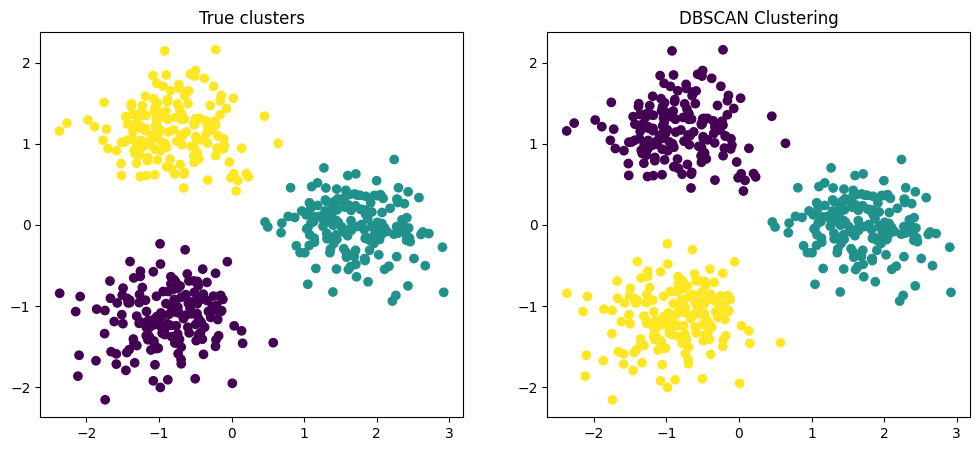

In [219]:
plot_clusters(X_,labels,dbscan_cluster.labels_, title_cluster="DBSCAN Clustering")

In [220]:
X_, pred_labels, true_labels = X_, dbscan_cluster.labels_, labels

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_,pred_labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_labels,pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels,pred_labels, average_method='arithmetic'))

Silhouette Coefficient: 0.685
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


## Spectral Clustering

Once again we get a very good clustering result, as both the Rand Index and Mutual Information Score reach a maximum value of 1. The Silhouette score is once again reported as 0.685.

In [221]:
spectral_cluster = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
spectral_cluster.fit(X_)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

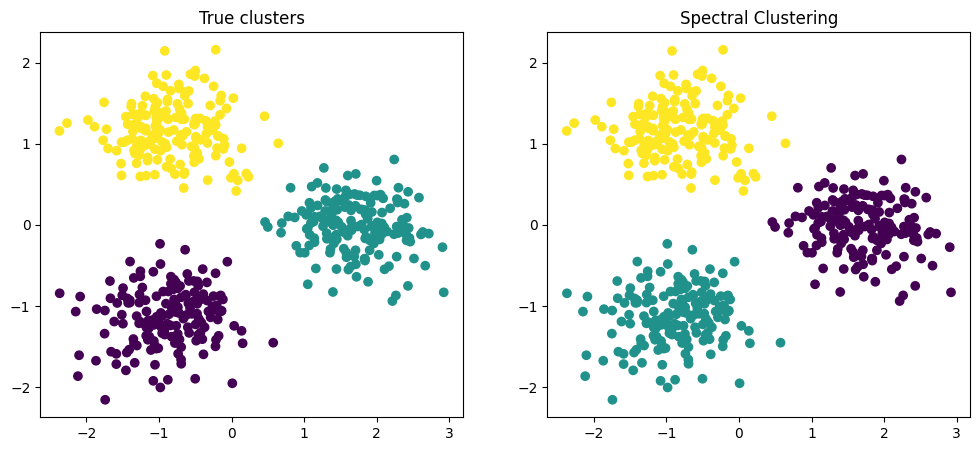

In [222]:
plot_clusters(X_,labels,spectral_cluster.labels_, title_cluster="Spectral Clustering")

In [223]:
X_, pred_labels, true_labels = X_, spectral_cluster.labels_, labels

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_,pred_labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_labels,pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels,pred_labels, average_method='arithmetic'))

Silhouette Coefficient: 0.685
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


Once again we get a very good clustering result, as both the Rand Index and Mutual Information Score reach a maximum value of 1. The Silhouette score is once again reported as 0.685.

0.0.1

In [224]:
# Helper function to plot

def plt_histogram (x, bins=50): 
    plt.hist(x, bins = bins)

def plt_scatter (x, y, labels): 
    plt.scatter (x, y, c=labels)

def compare_clusters (data, true_labels=None, cluster_labels=None, title_true="True clusters", title_cluster="Agglomerative Clustering"): 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.scatter (data[:, 0], data[:, 1], c=true_labels) 
    ax1.set_title(title_true)

    if cluster_labels is not None:
        ax2.scatter (data[:, 0], data[:, 1], c=cluster_labels) 
        ax2.set_title(title_cluster)

    plt.show()

def get_scores (true_labels, pred_labels):
    rand_index = metrics. adjusted_rand_score (true_labels, pred_labels)
    mutual_info = metrics. adjusted_mutual_info_score(true_labels, pred_labels,average_method='arithmetic')
    return rand_index, mutual_info

def get_normalized_laplacian (W):
    D = np.diag(np.sum (W, axis=1)) 
    I = np. eye (D.shape[0])
    Lraw = I - np.linalg.inv(D) @ W
    return Lraw

def get_k_lower_eigen (L, k=10):
    evalues, evectors = np.linalg.eig(L)
    index = evalues.argsort()
    lower_evalues, lower_evectors = evalues [index [:k]], evectors [:, index [k]]
    return np.real (lower_evalues), np.real (lower_evectors)

def plot_eigen_values (values):
    x = np.arange(len(values)) 
    plt.title("eigenvalue") 
    plt.plot(x, values, "*")

def plot_eigen_vectors (vectors, num_elems=10, k=5, figsize=(20, 5)): 
    fig, ax = plt.subplots(1, k, figsize-figsize)
    for i in range (k):
        ax [i].plot(np.arange(num_elems), vectors [:num_elems, i], "b-") 
        ax[i].set_title(f"eigenvector {i}")